## Introduction

Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains 183412 rows and 16 columns.

The objective of this project is to discover useful patterns and informations from the dataset, explore the relationship between the features of the dataset using different visualization methods, and also to extract key insights from the data exploration as a presentation slide show.
The visualizations will consist of all the different types of plots (univariate, bivariate and multivariate).

In [1]:
# import the librarries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset and view the first five rows

bike_data = pd.read_csv("201902-fordgobike-tripdata.csv")


bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# view the shape of the dataset

bike_data.shape

(183412, 16)

In [4]:
# View the dataset info

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# check for the rows with missing records

bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [ ]:
# We observed missing records for the start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year,member_gender 

In [ ]:
# Firstly, we will deal with the start_station_id, start_station_name, end_station_id, end_station_name

In [6]:

# check for rows with missing station_id and station_name
bike_data[(bike_data.start_station_id.isna() & bike_data.start_station_name.isna() ) | (bike_data.end_station_id.isna() & bike_data.end_station_name.isna())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


In [7]:
# Drop rows with missing records for start_station_id and station name

bike_data = bike_data[~((bike_data.start_station_id.isna() & bike_data.start_station_name.isna() ) | (bike_data.end_station_id.isna() & bike_data.end_station_name.isna()))]

In [8]:
bike_data.shape

(183215, 16)

In [9]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [10]:
# show rows with missing records for birth year and gender

bike_data[(bike_data.member_birth_year.isna() | bike_data.member_gender.isna())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [11]:
# drop rows with missing records for birth year and gender

bike_data = bike_data[~((bike_data.member_birth_year.isna() | bike_data.member_gender.isna()))]

In [12]:
bike_data.shape

(174952, 16)

In [13]:
bike_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [ ]:
# We have now successfully cleaned the dataset

In [14]:
# dropping Unnecessary Columns

bike_data.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_id', 'end_station_id'], inplace=True)

bike_data.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [15]:
# check for duplicate records

bike_data.duplicated().sum()

0

In [ ]:
# Fixing the wrong data types

- incorrect data type for duration_sec - datetime
- incorrect data type for start_time - datetime
- incorrect data type for end_time - datetime
- incorrect data type for bike_id - object
- incorrect data type for member_birth_year - object

In [16]:
# change the datatype for start_time and end_time to datetime

bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

In [17]:
# change the data type for bike_id to string
bike_data['bike_id'] = bike_data['bike_id'].astype(str)

In [18]:
# change the data type for member_birth_year to str
bike_data['member_birth_year'] = bike_data['member_birth_year'].astype(str)

In [19]:
# remove .0 from all member_birth_year record

bike_data['member_birth_year'] = bike_data['member_birth_year'].str[:4]

In [20]:
# change the data type for member_birth_year to int
bike_data['member_birth_year'] = bike_data['member_birth_year'].astype(int)

In [24]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No


In [21]:
# Adding a new column (member_age) to the table making use of 2019 as the year data was generated according to the data source document


bike_data['member_age'] = bike_data.member_birth_year.apply(lambda x: 2019 - x)

In [22]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  object        
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  int32         
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
 10  member_age               174952 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(2), object(6)
memory usage: 15.3+ MB


In [23]:
# Extracting the Minutes colmun from the seconds column

bike_data["duration_min"] = (bike_data.duration_sec / 60)
bike_data['duration_min'] = bike_data['duration_min'].apply(np.ceil)

In [24]:
# Extracting the hour colmun from the seconds column

bike_data["duration_hour"] = (bike_data.duration_sec / 3600)
bike_data['duration_hour'] = bike_data['duration_hour'].apply(np.ceil)

In [25]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,870.0,15.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,1031.0,18.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,609.0,11.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,27.0,1.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,30.0,1.0


In [26]:
# converting the new coulumns to interger

bike_data["duration_min"] = bike_data["duration_min"].astype(int)
bike_data['duration_hour'] = bike_data['duration_hour'].astype(int)

In [27]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,870,15
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,1031,18
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,609,11
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,27,1
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,30,1


In [28]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  object        
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  int32         
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
 10  member_age               174952 non-null  int64         
 11  duration_min             174952 non-null  int32         
 12  duration_hour   

### Univariate Data Exploration 

Questions for the univariate data exploration includes;

-   Which user type category has the highest count?
-	Which member gender category has the highest count?
-	What is the usage rate of the bikes? This can be obtained using the bike_id count.
-	Distribution plot of Member's Age 
-	Distribution plot of Ride Duration in Minutes
-	Distribution plot of Ride Duration in Hours
-	Distribution plot of old member's age i.e members above 60 yrs of age
-	Histplot of Teenage member's Age i.e members above 12 yrs and less than 20 yrs of age




In [29]:
base_color = sns.color_palette()[0]

def plots(data = " ", xlabel = " ", ylabel = " "):
    plt.figure(figsize=(12,8))
    base_color = sns.color_palette()[0]
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(data, fontsize=16, fontweight= 'bold')
    plt.xticks(rotation=45)
    


#### 1. Which user type category has the highest count?

In [30]:
bike_data['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

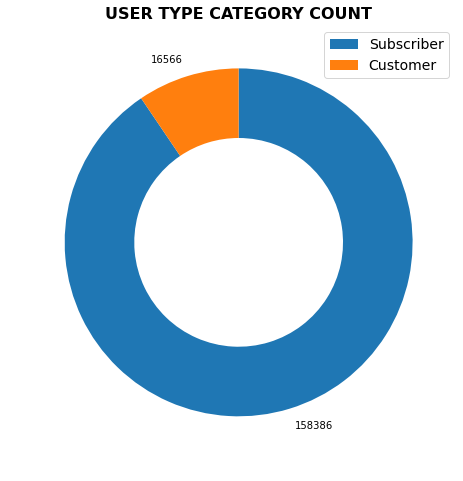

In [31]:
data = bike_data['user_type'].value_counts()

plots("USER TYPE CATEGORY COUNT")
plt.pie(data, labels=data.values, 
    startangle=90, counterclock=False, wedgeprops = {'width' : 0.4})
plt.legend(data.index, fontsize=14);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


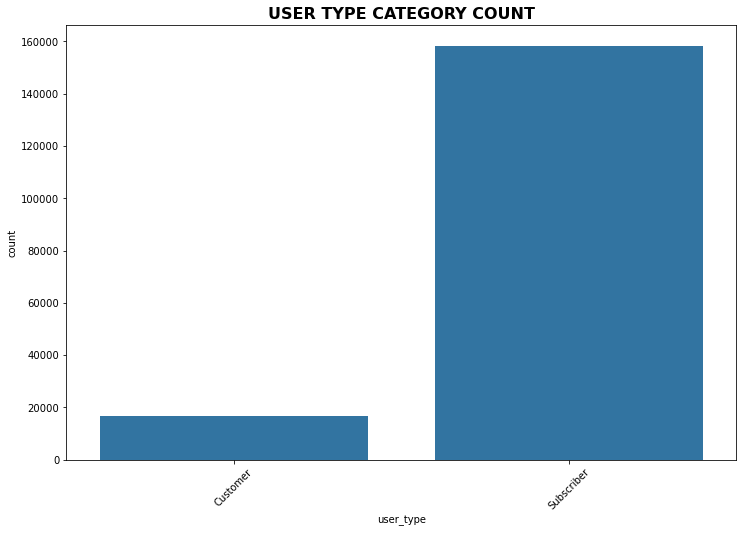

In [32]:

plots('USER TYPE CATEGORY COUNT', 'User type', 'Count')
sns.countplot(bike_data['user_type'], color = base_color);

The two plots above show that the majority of the user types are subscribers.

#### 2. Which member gender category has the highest count?

In [33]:
bike_data.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

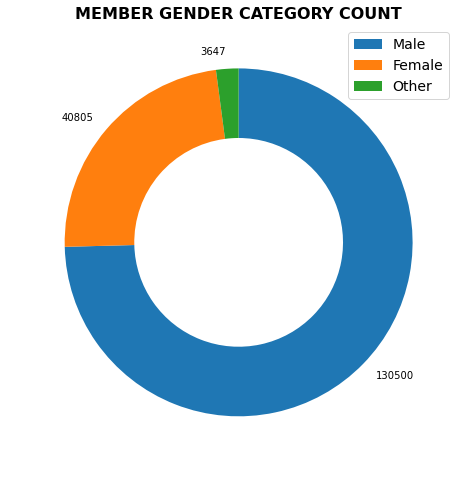

In [34]:
data = bike_data['member_gender'].value_counts()

plots("MEMBER GENDER CATEGORY COUNT")
plt.pie(data, labels=data.values, 
    startangle=90, counterclock=False, wedgeprops = {'width' : 0.4})

plt.legend(data.index, fontsize=14);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


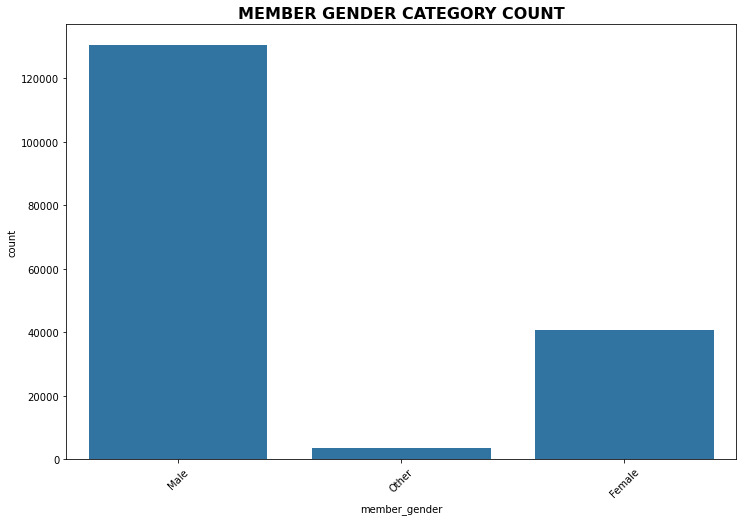

In [35]:

plots('MEMBER GENDER CATEGORY COUNT', 'Member Gender', 'Count')
sns.countplot(bike_data['member_gender'], color = base_color);

The two plots above confirms that the majority of the members are male

#### 3. Which bike share for all trip category has the highest count?

In [36]:
bike_data['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

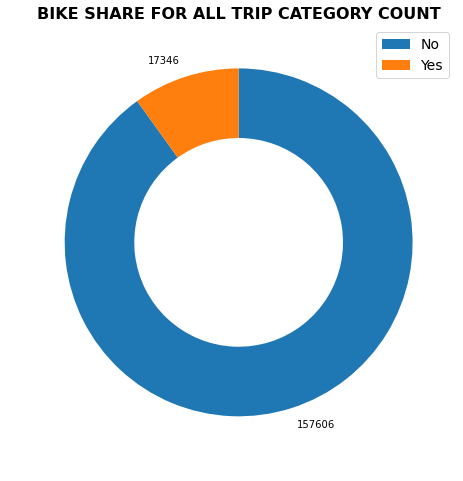

In [37]:
data = bike_data['bike_share_for_all_trip'].value_counts()

plots("BIKE SHARE FOR ALL TRIP CATEGORY COUNT")
plt.pie(data, labels=data.values, 
    startangle=90, counterclock=False, wedgeprops = {'width' : 0.4})

plt.legend(data.index, fontsize=14);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


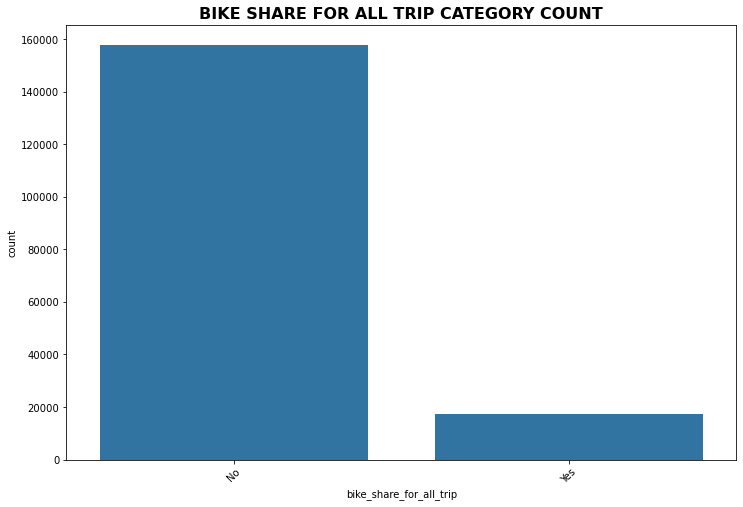

In [38]:

plots('BIKE SHARE FOR ALL TRIP CATEGORY COUNT', 'Bike Share for all Trip', 'Count')
sns.countplot(bike_data['bike_share_for_all_trip'], color = base_color);

The two plots above confirms that the majority of the bike share are not for all trip

#### 4. Distribution plot of Member's Age

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


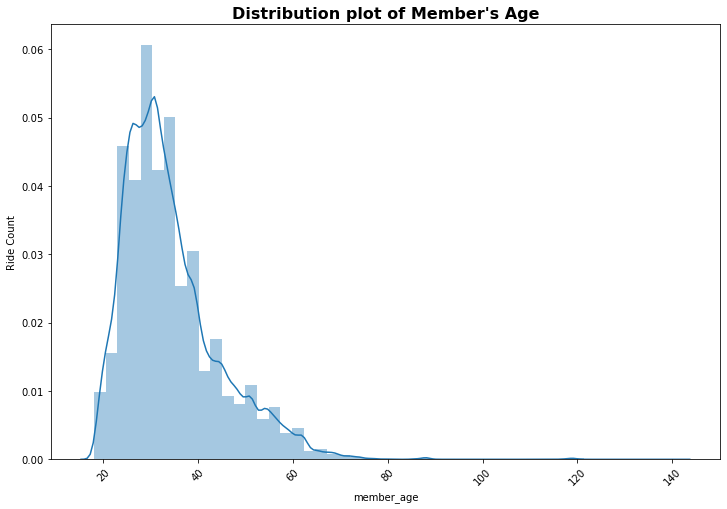

In [39]:
plots("Distribution plot of Member's Age", "Member Age", "Ride Count")
sns.distplot(bike_data['member_age']);

The plot above shows that most of the members are of age range age 25 - 35 yrs

#### 5. Distribution plot of Ride Duration in Minutes

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


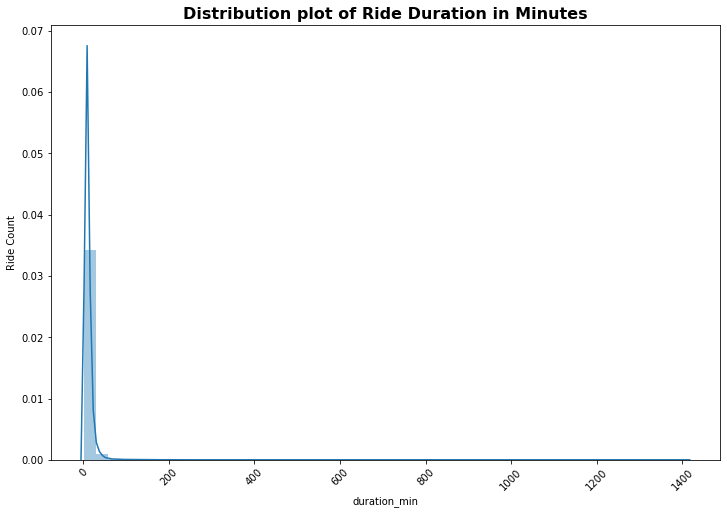

In [40]:
plots("Distribution plot of Ride Duration in Minutes", "Ride Duration (mins) ", "Ride Count")
sns.distplot(bike_data['duration_min']);

From the above plot, we observed that all the rides were less than 200 mins

#### 6. Distribution plot of Ride Duration in Hours

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


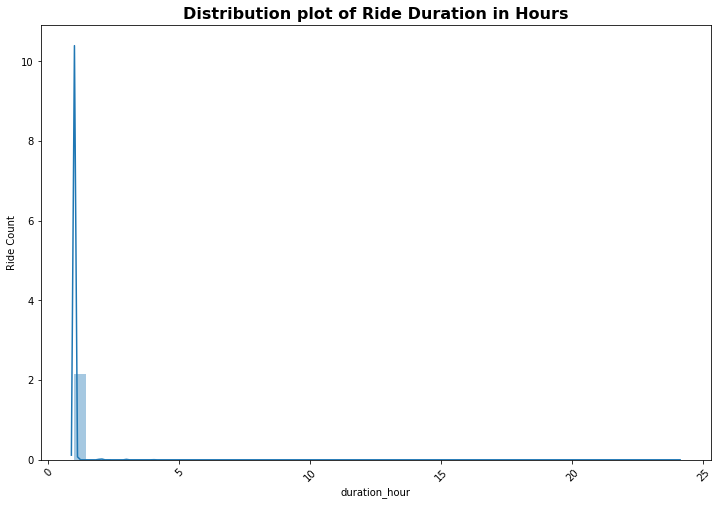

In [41]:
plots("Distribution plot of Ride Duration in Hours", "Ride Duration (Hrs) ", "Ride Count")
sns.distplot(bike_data['duration_hour']);

The plot above shoes that almost all the trips is with the range on 1 hour

#### 7. Distribution plot of old member's age i.e members above 60 yrs of age

In [42]:
old_members = bike_data[bike_data['member_age'] > 60]
old_members

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hour
495,235,2019-02-28 21:17:57.047,2019-02-28 21:21:52.631,Father Alfred E Boeddeker Park,Market St at 10th St,5202,Subscriber,1954,Male,No,65,4,1
505,352,2019-02-28 21:14:29.897,2019-02-28 21:20:22.700,Montgomery St BART Station (Market St at 2nd St),Beale St at Harrison St,5108,Subscriber,1958,Male,No,61,6,1
765,630,2019-02-28 20:25:20.686,2019-02-28 20:35:51.676,Telegraph Ave at 58th St,Telegraph Ave at 58th St,5759,Subscriber,1956,Female,No,63,11,1
838,875,2019-02-28 20:08:36.373,2019-02-28 20:23:11.948,Broadway at Kearny,San Francisco Caltrain Station 2 (Townsend St...,6234,Subscriber,1958,Male,No,61,15,1
929,120,2019-02-28 20:10:23.915,2019-02-28 20:12:24.382,The Embarcadero at Vallejo St,Steuart St at Market St,5234,Subscriber,1958,Male,No,61,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183258,966,2019-02-01 05:57:01.688,2019-02-01 06:13:08.313,Esprit Park,Steuart St at Market St,1338,Subscriber,1952,Male,No,67,17,1
183304,373,2019-02-01 04:42:44.709,2019-02-01 04:48:58.076,22nd St at Dolores St,Harrison St at 20th St,5427,Subscriber,1958,Male,No,61,7,1
183305,100,2019-02-01 04:46:54.805,2019-02-01 04:48:34.843,Townsend St at 5th St,San Francisco Caltrain Station 2 (Townsend St...,3138,Subscriber,1950,Male,No,69,2,1
183385,400,2019-02-01 00:46:47.276,2019-02-01 00:53:27.596,San Pablo Ave at MLK Jr Way,Webster St at 19th St,3487,Subscriber,1945,Male,Yes,74,7,1


In [43]:
old_members.user_type.value_counts()

Subscriber    3336
Customer       194
Name: user_type, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


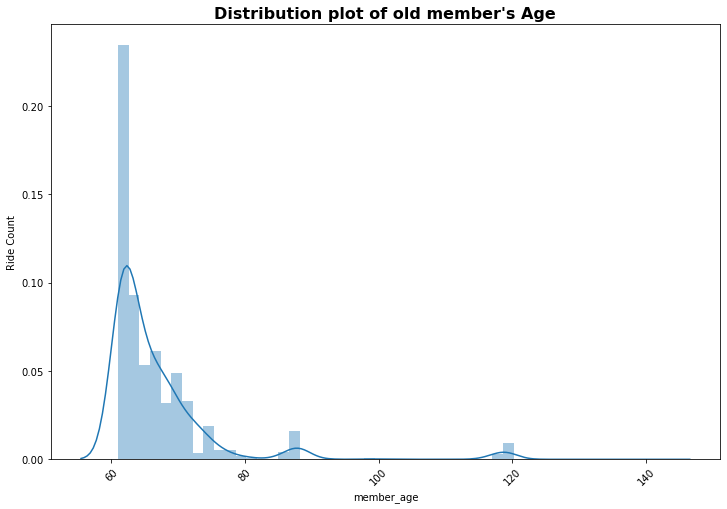

In [44]:
plots("Distribution plot of old member's Age", "Member Age", "Ride Count")
sns.distplot(old_members['member_age']);

The plot above shows that a large number of the old members are within the age range of 60 - 70 yrs

#### 8. Histplot of Teenage member's Age i.e members above 12 yrs and less than 20 yrs of age

In [45]:
Teenage_members = bike_data[(bike_data['member_age'] >12) & (bike_data['member_age'] < 20)]
Teenage_members

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hour
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,The Embarcadero at Sansome St,San Francisco Ferry Building (Harry Bridges Pl...,6531,Customer,2000,Male,No,19,7,1
127,200,2019-02-28 22:58:16.766,2019-02-28 23:01:37.200,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,5079,Subscriber,2000,Male,No,19,4,1
320,313,2019-02-28 21:52:45.603,2019-02-28 21:57:59.011,Haste St at Telegraph Ave,Fulton St at Bancroft Way,2472,Subscriber,2000,Female,No,19,6,1
330,759,2019-02-28 21:42:59.983,2019-02-28 21:55:39.891,Steuart St at Market St,Market St at 10th St,5234,Subscriber,2000,Female,No,19,13,1
370,1178,2019-02-28 21:27:18.901,2019-02-28 21:46:56.933,Telegraph Ave at 23rd St,Genoa St at 55th St,5672,Customer,2000,Female,No,19,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183361,370,2019-02-01 01:21:03.853,2019-02-01 01:27:14.140,Jones St at Post St,S Van Ness Ave at Market St,5059,Subscriber,2000,Female,No,19,7,1
183364,892,2019-02-01 01:08:43.731,2019-02-01 01:23:35.763,Market St at 10th St,Valencia St at 22nd St,3392,Subscriber,2000,Male,No,19,15,1
183365,932,2019-02-01 01:07:51.908,2019-02-01 01:23:24.370,Market St at 10th St,Valencia St at 22nd St,4962,Subscriber,2000,Female,No,19,16,1
183366,932,2019-02-01 01:07:49.971,2019-02-01 01:23:22.528,Market St at 10th St,Valencia St at 22nd St,5382,Subscriber,2000,Female,No,19,16,1


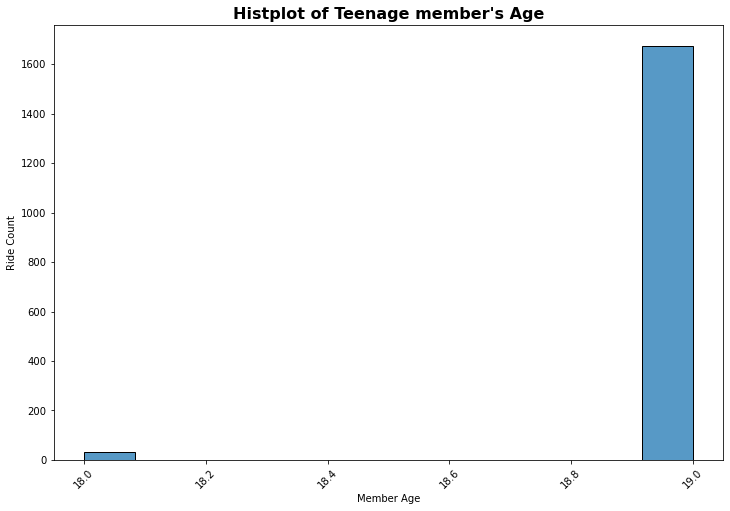

In [46]:
plots("Histplot of Teenage member's Age", "Member Age", "Ride Count")
sns.histplot(Teenage_members['member_age']);

From the plot above, we observed that almost of the teenage members are 19 yrs old.

### BIVARIATE DATA EXPLORATION

The bivariate data exploration includes plots on the following relationships;

-	Relationship between User Type and Member Age
-	Relationship between Member Gender and Member Age
-	Relationship between bike_share_for_all_trip and Member age
-	Relationship between Member Gender and Trip Duration (minutes)
-	Relationship between User Type and Trip Duration (minutes)
-	Relationship between Bike share for all trip and Trip Duration (minutes)
-   Relationship User Type and Trip Duration (minutes)
-   Relationship Between Member Gender and User Type
-   Relationship Between User Type and Bike Share For All Trip
-   Relationship Between Member Gender and Bike Share For All Trip





#### 1. Relationship between User Type and Member Age

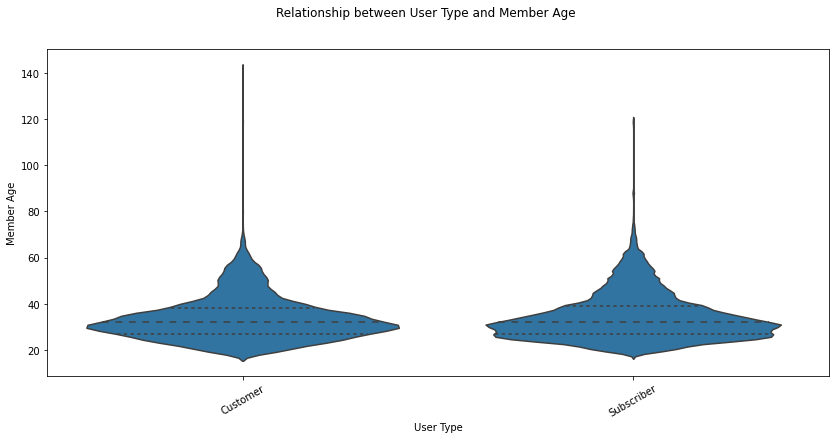

In [47]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.suptitle("Relationship between User Type and Member Age")
sns.violinplot(data=bike_data, x='user_type', y='member_age', color=base_color, inner="quartile", ax=ax)
ax.set_xlabel("User Type")
ax.set_ylabel("Member Age")
plt.xticks(rotation=30);

The plot above shows that most of the users are within the age 25 -35 years

#### 2. Relationship between Member Gender and Member Age

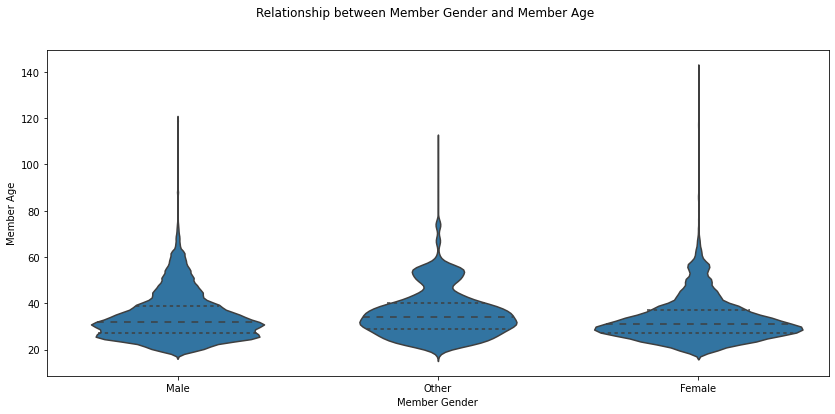

In [48]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.suptitle("Relationship between Member Gender and Member Age")

sns.violinplot(data=bike_data, x='member_gender', y='member_age', color=base_color, inner="quartile", ax=ax)
ax.set_xlabel("Member Gender")
ax.set_ylabel("Member Age");

The plot above shows that all the genders have more members who are within the range of age 25 -35 years more than any other age range.

#### 3. Relationship between bike_share_for_all_trip and Member age

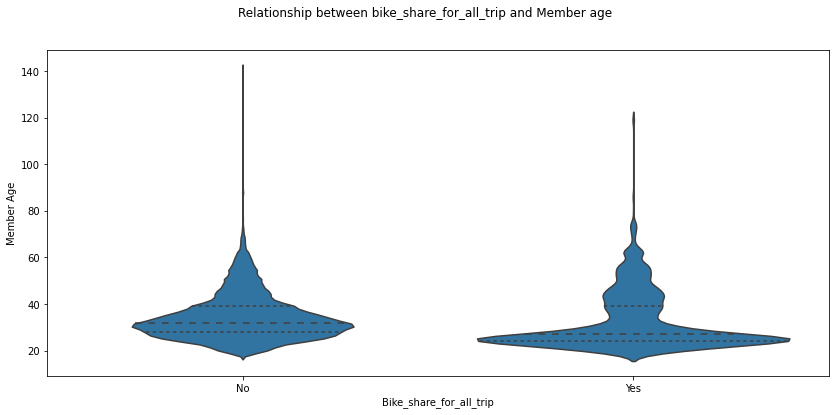

In [49]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.suptitle("Relationship between bike_share_for_all_trip and Member age")

sns.violinplot(data=bike_data, x='bike_share_for_all_trip', y='member_age', color=base_color, inner="quartile", ax=ax)
ax.set_xlabel("Bike_share_for_all_trip")
ax.set_ylabel("Member Age");

The plot above shows that most of the members who do not take all round trip are within the age 20 -35years, while the members who take all round trip have a bit more concentration in the age range 25 yrs.

#### 4. Relationship between Member Gender and Trip Duration (minutes)

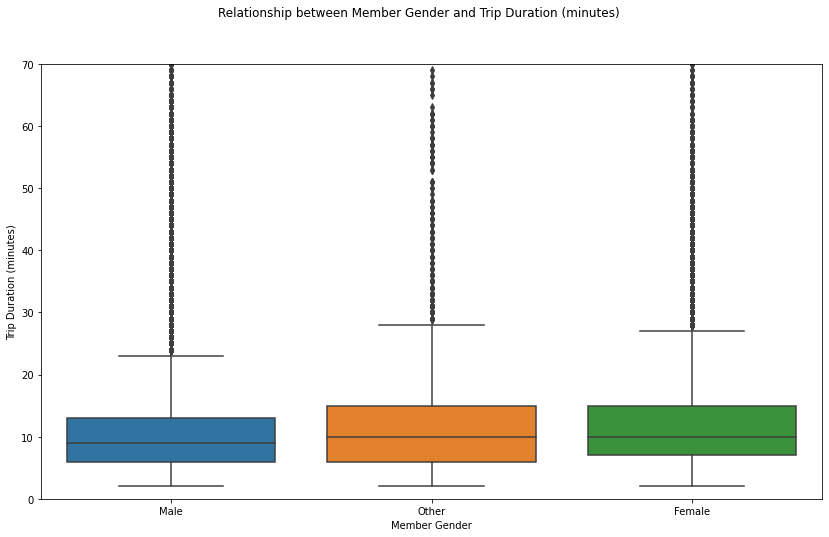

In [50]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.suptitle('Relationship between Member Gender and Trip Duration (minutes)')
ax.set_ylim((0, 70))
sns.boxplot(data=bike_data, x='member_gender', y='duration_min', ax=ax)
ax.set_xlabel("Member Gender")
ax.set_ylabel("Trip Duration (minutes)");

From the plot above, we observed that the median trip duration (in minutes) for each of the gender types is around 10 minutes.

#### 5. Relationship between User Type and Trip Duration (minutes)

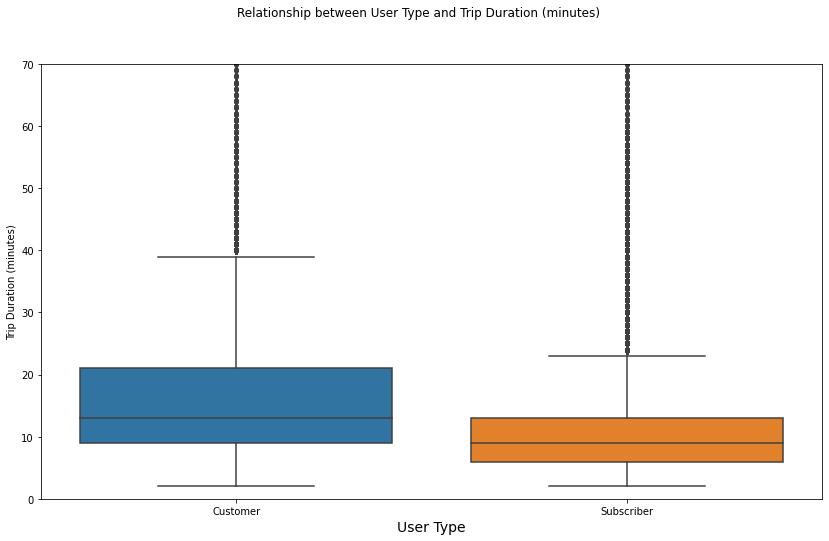

In [51]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.suptitle('Relationship between User Type and Trip Duration (minutes)')
ax.set_ylim((0, 70))
sns.boxplot(data=bike_data, x='user_type', y='duration_min', ax=ax)
ax.set_xlabel("User Type", fontsize=14)
ax.set_ylabel("Trip Duration (minutes)");

From the above plot, we observed that the median trip duration (in minutes) for customers is within the range of 15 mins while that of subscribers is within the range of 10 minutes.

#### 6. Relationship between Bike share for all trip and Trip Duration (minutes)

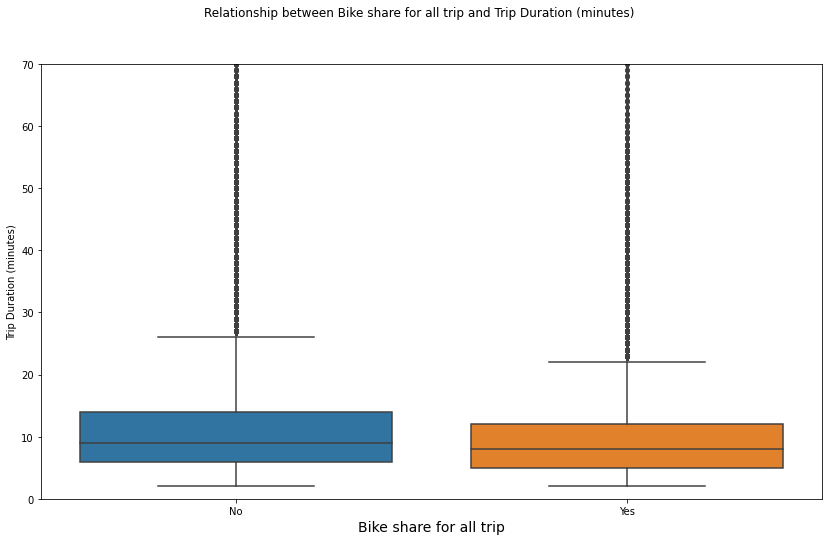

In [52]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.suptitle('Relationship between Bike share for all trip and Trip Duration (minutes)')
ax.set_ylim((0, 70))
sns.boxplot(data=bike_data, x='bike_share_for_all_trip', y='duration_min', ax=ax)
ax.set_xlabel("Bike share for all trip", fontsize=14)
ax.set_ylabel("Trip Duration (minutes)");

From the plot above, we observed that the median trip duration (in minutes) for each bike share for all trip category is within of 10 minutes.

#### 7. Relationship between User Type and Trip Duration (minutes)

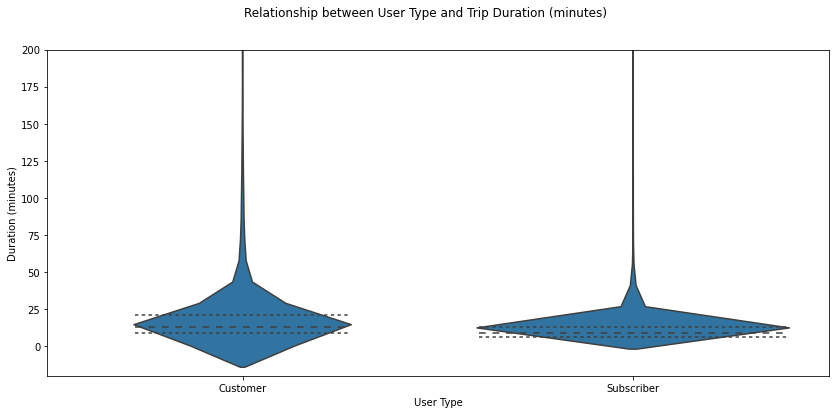

In [53]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.suptitle("Relationship between User Type and Trip Duration (minutes)")

sns.violinplot(data=bike_data, x='user_type', y='duration_min', color=base_color, inner="quartile", ax=ax)
ax.set_ylim((-20, 200))
ax.set_xlabel("User Type")
ax.set_ylabel("Duration (minutes)");

The plot above shows that the Subscribers had more rides where the ride duration (in minutes) is within the range of 10 mins, while the customers had more rides whose ride duration in minutes is within 15mins.

#### 8. Relationship Between Member Gender and User Type

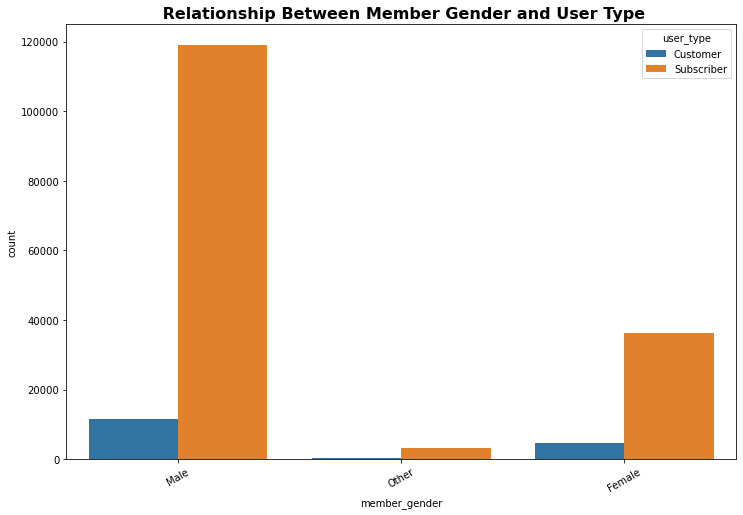

In [54]:
plots(" Relationship Between Member Gender and User Type")
sns.countplot(data = bike_data, x = 'member_gender', hue = 'user_type')
plt.xticks(rotation=30);

From the plot above, we observed that each of the gender have more members who are subscribers than customers. We observed that Male has the highest number of subscribers followed by Female.

#### 9. Relationship Between User Type and Bike Share For All Trip

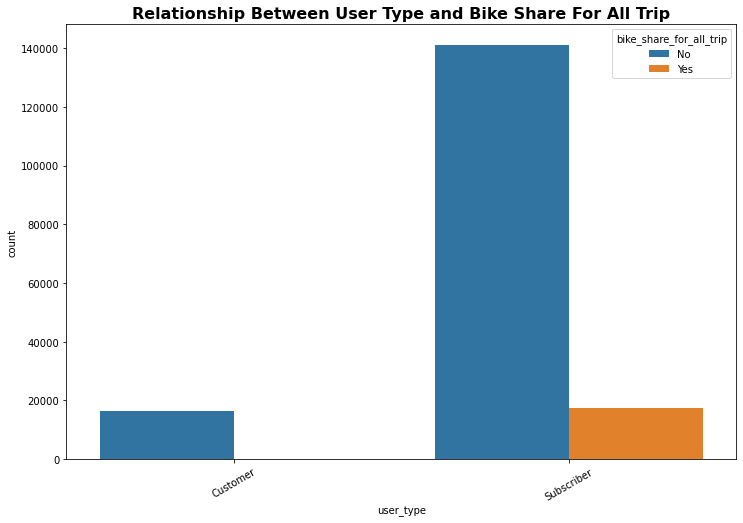

In [55]:
plots("Relationship Between User Type and Bike Share For All Trip")
sns.countplot(data = bike_data, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.xticks(rotation=30);

From the plot above, we observed that majority of the subscribers are not for all trip

#### 10. Relationship Between Member Gender and Bike Share For All Trip

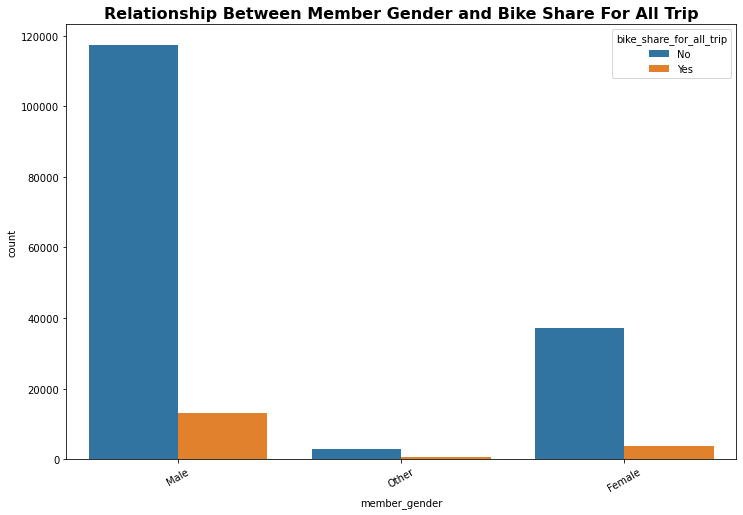

In [56]:
plots("Relationship Between Member Gender and Bike Share For All Trip")
sns.countplot(data = bike_data, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.xticks(rotation=30);

From this plot, we observed each of the gender category prefers single round trip than the all round trip, this means that just a few number of the members prefers the around trip.

### MULTIVARIATE DATA EXPLORATION 

The multivariate data exploration includes plot on the following relationships;

-	Relationship between Gender, Age, and User Type
-	Relationship between Duration_min, Member_gender, and User_type
-	Relationship between User Type, Gender, and Hour of the Day
-	Relationship between User Type, Gender, and Day of the Week
-	Relationship between bike_share_for_all_trip, Gender, and Hour of the Day
-	Relationship between bike_share_for_all_trip, user_type, and Hour of the Day



#### 1. Relationship between Gender, Age, and Bike_share_for_all_trip

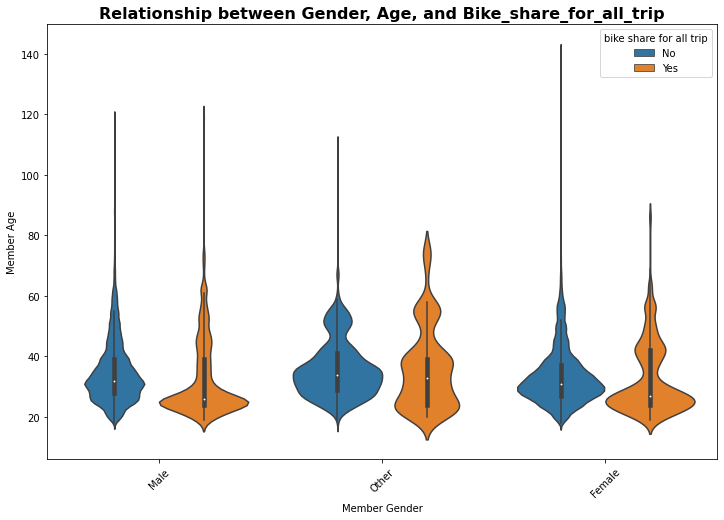

In [57]:
plots("Relationship between Gender, Age, and Bike_share_for_all_trip")
plot = sns.violinplot(data=bike_data, x='member_gender', y='member_age', hue="bike_share_for_all_trip")
plot.set_xlabel("Member Gender")
plot.set_ylabel("Member Age")
plot.legend(title="bike share for all trip");

#### 2. Relationship between Member gender, Age and Bike_share_for_all_trip

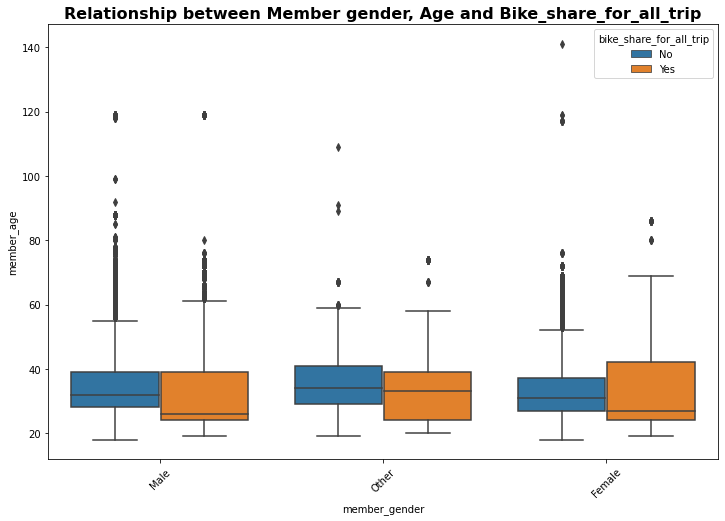

In [58]:
plots("Relationship between Member gender, Age and Bike_share_for_all_trip")
sns.boxplot(data = bike_data, x = 'member_gender', y='member_age', hue = 'bike_share_for_all_trip')
plot.set_xlabel('Member Gender');
plot.set_ylabel("Member Age")
plot.legend(title="bike share for all trip");

From this plot, we observed that the median age for the males who doesn't take all round trip is around 30 yrs, while that of those who do is around 25 yrs.

Also, it was noticed that the median age for female members who who doesn't take the all round trip is also around 30yrs, while that of those who do is also within the range of 25yrs.

Finally, we observed that for the others gender type, the age range for those who prefers the all round trip and those who not is within the range 35 yrs.

#### 3. Relationship between Duration_min, Member_gender and User_type

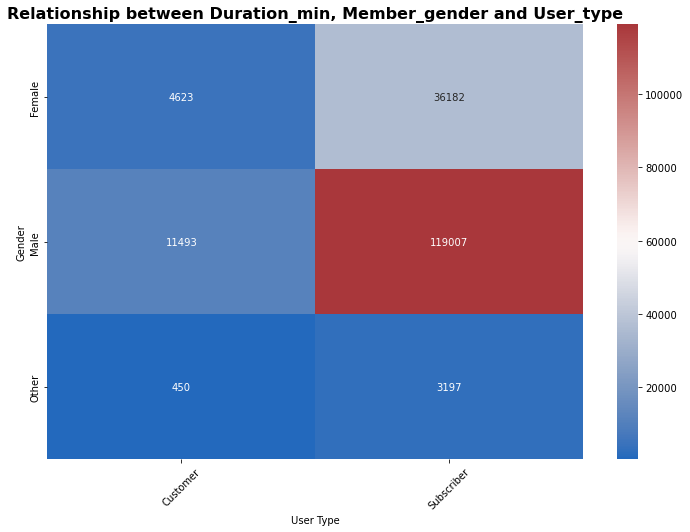

In [59]:
data = bike_data.pivot_table('duration_min', 'member_gender', 'user_type', aggfunc="count")
plots("Relationship between Duration_min, Member_gender and User_type")
plot = sns.heatmap(data=data, annot=True, fmt=".0f", cmap='vlag')
plot.set_xlabel("User Type")
plot.set_ylabel("Gender");

From the above plot, we observed that most of the subscribers are male and also that the male subscribers have the highest duration of ride in minutes.

#### 4. Relationship between Trip Duration (mins) , Member_gender and Bike_share_for_all_trip

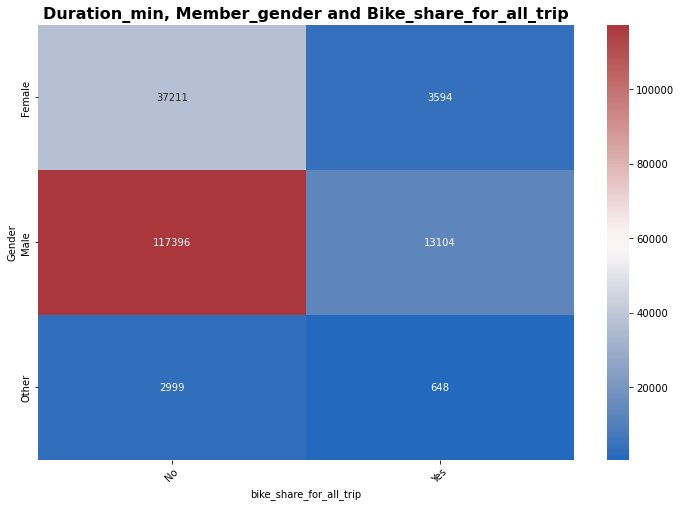

In [60]:
data = bike_data.pivot_table('duration_min', 'member_gender', 'bike_share_for_all_trip', aggfunc="count")
plots("Duration_min, Member_gender and Bike_share_for_all_trip")
plot = sns.heatmap(data=data, annot=True, fmt=".0f", cmap='vlag')
plot.set_xlabel("bike_share_for_all_trip")
plot.set_ylabel("Gender");

From the above plot, we observed that Male subscribers have the highest duration of ride in minutes.

#### 5. Relationship between Duration (minutes), Member gender and Bike share for all trip

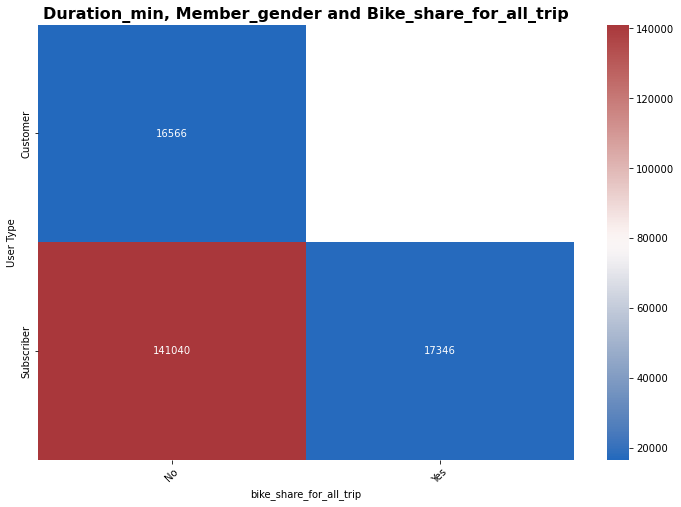

In [61]:
data = bike_data.pivot_table('duration_min', 'user_type', 'bike_share_for_all_trip', aggfunc="count")
plots("Duration_min, Member_gender and Bike_share_for_all_trip")
plot = sns.heatmap(data=data, annot=True, fmt=".0f", cmap='vlag')
plot.set_xlabel("bike_share_for_all_trip")
plot.set_ylabel("User Type");

From the above plot, we observed that most subscribers who do not subscribe for all trip has the highest count.
This further more confirms that most members are not interested in subscribing for the all round trip